# Use Cases for Outlipy Detection

### **DISCLAIMER**

Please be aware that the code and techniques demonstrated here, utilizing Outlipy, are strictly for illustrative and educational purposes only. This demonstration has been performed without consideration of the underlying data context, domain knowledge, or business objectives.

**Important Considerations for Real-World Application**<br><br>
Blindly applying outlier detection and handling techniques can lead to severely misleading results. For professional Exploratory Data Analysis (EDA) and data preprocessing, you must take the following factors into account:

1. **Domain Knowledge is Crucial**: Outliers may represent legitimate, critical, and rare events (e.g., a high-value transaction, a system failure, or a unique physical measurement). Consult with subject matter experts before modifying or removing any data.

2. **Technique Context**: The chosen detection method (e.g., IQR, Z-score, Isolation Forest) and handling technique (e.g., Winsorization, removal, interpolation) must be carefully selected based on the nature and distribution of the data, as well as the requirements of the downstream model.

3. **Impact on Statistical Integrity**: Handling outliers always alters the variance and distribution of the data. Improper application can introduce bias and negatively affect the statistical integrity and generalizability of your final model.

Use the results of this demonstration with caution.

In [1]:
import pandas as pd
import outlipy
import matplotlib.pyplot as plt
import seaborn as sns

dataset was taken from kaggle called Employee Salary Dataset by Prince Rajak

> Link: (https://www.kaggle.com/datasets/prince7489/employee-salary-dataset)

In [2]:
df = pd.read_csv("../dataset/Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.dropna(inplace = True) # be sure to drop the NA values, or the detectors fails.

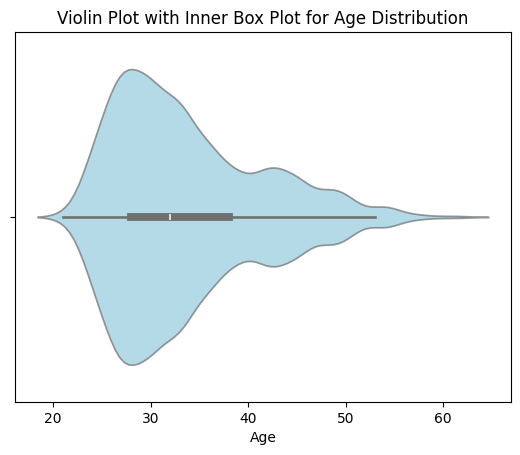

In [4]:
sns.violinplot(
    x='Age', 
    data=df, 
    inner='box', 
    color='skyblue', 
    alpha=0.7
)

plt.title("Violin Plot with Inner Box Plot for Age Distribution")
plt.show()

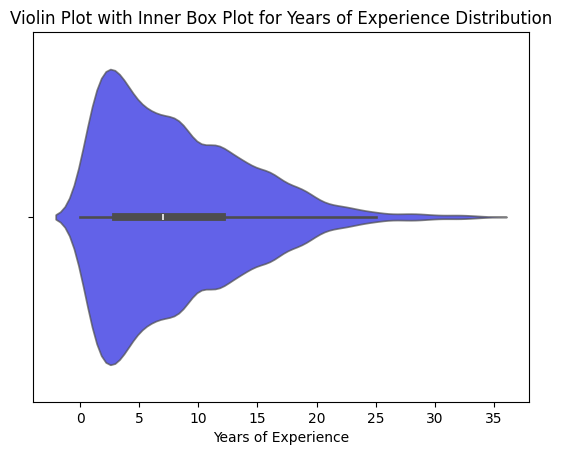

In [5]:
sns.violinplot(
    x='Years of Experience', 
    data=df, 
    inner='box', 
    color='blue', 
    alpha=0.7
)

plt.title("Violin Plot with Inner Box Plot for Years of Experience Distribution")
plt.show()

# Using Detectors

The detectors can be used in two ways, either by using the pandas accessor api **"outli"**,
> ex: df.outli.iqr() 

or

using the detector class directly.
> iqr = IQRDetector() <br>
> mask = iqr.detect()

### Here are the list of detectors along with their accessor.

- **IQR Detection**
    - IQRDetector()
    - outli.iqr()
- **Zscore Detection**
    - ZScoreDetector()
    - outli.zscore()
- **Modified Absolute Deviation Detection**
    - MADDetector()
    - outli.mad()
- **Percentile Detection**
    - PercentileDetector
    - outli.percentile()


### IQR Detection
The Interquartile Range (**IQR**) detection method is a robust statistical technique used to identify **outliers** in a dataset. It is based on the difference between the **first quartile ($Q_1$)**, which marks the 25th percentile, and the **third quartile ($Q_3$)**, which marks the 75th percentile, encompassing the middle 50% of the data. The IQR is calculated simply as $Q_3 - Q_1$. To define the outlier boundaries, the method uses the **$1.5 \times \text{IQR}$ rule**, where a **Lower Fence** is set at $Q_1 - (1.5 \times \text{IQR})$ and an **Upper Fence** is set at $Q_3 + (1.5 \times \text{IQR})$. Any data point falling outside this range is flagged as an outlier, making this method less susceptible to the influence of extreme values compared to standard deviation-based techniques.

#### To use the IQR:
The accessor method, has three arguments: threshold and columns.
- threshold (float): the threshold you use (default 1.5).
- columns (Optional[List[str]]): the columns you want to include.
- exclude (Optional[List[str]]): the colunms you want to exclude.

> df.outli.iqr(threshold: float = 1.5, columns: Optional[List[str]] = None, exclude: Optional[List[str]] = None) <br>

When using class, the arguments remain the same, except that the detect() method requires one argument "df".
- df (pd.DataFrame): the dataframe you want to detect the outliers.

> iqr = IQRDetector(threshold: float = 1.5, columns: Optional[List[str]] = None, exclude: Optional[List[str]] = None) <br>
> mask_iqr = iqr.detect(df: pd.DataFrame)

In [6]:
# This is an example of using the pandas accessor iqr method.
mask_iqr = df.outli.iqr()
mask_iqr.head()

,Age,Years of Experience,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [7]:
# you can actually use .sum() method to count the outliers
mask_iqr.sum()

Age                    123
Years of Experience     75
Salary                   0
dtype: int64

In [8]:
# using the class method
iqr = outlipy.IQRDetector(exclude = ["id"])
mask_iqr = iqr.detect(df)
mask_iqr.sum()

Age                    123
Years of Experience     75
Salary                   0
dtype: int64

### Zscore Detector

The Z-score detector is a foundational, parametric technique used for identifying outliers in a dataset, best suited for data that approximates a normal distribution. The method involves calculating the Z-score (or standard score) for every individual data point, which quantifies the distance between that point and the dataset's mean ($\mu$) in terms of the standard deviation ($\sigma$). Specifically, the Z-score is calculated as $Z = (X - \mu) / \sigma$. An outlier is then flagged by setting a predetermined threshold, most commonly $|Z| > 3$. This threshold is statistically significant because, under a normal distribution, approximately 99.7% of the data is expected to fall within three standard deviations of the mean. Therefore, any observation lying outside this range is deemed a rare event and flagged as an anomaly or outlier. However, a key limitation of this method is its sensitivity to extreme outliers in non-normal data, as these points can heavily inflate the standard deviation, potentially causing other true outliers to be overlooked (a phenomenon called masking).

#### To use the Zscore:
The accessor method, has three arguments: threshold and columns.
- threshold (float): the threshold you use (default 3).
- columns (Optional[List[str]]): the columns you want to include.
- exclude (Optional[List[str]]): the colunms you want to exclude.

> df.outli.zscore(threshold: float = 3, columns: Optional[List[str]] = None, exclude: Optional[List[str]] = None) <br>

When using class, the arguments remain the same, except that the detect() method requires one argument "df".
- df (pd.DataFrame): the dataframe you want to detect the outliers.

> zscore = ZScoreDetector(threshold: float = 1.5, columns: Optional[List[str]] = None, exclude: Optional[List[str]] = None) <br>
> mask_zscore = zscore.detect(df: pd.DataFrame)

In [9]:
mask_zscore = df.outli.zscore()
mask_zscore.sum()

Age                    28
Years of Experience    68
Salary                  0
dtype: int64

In [10]:
zscore = outlipy.ZScoreDetector()
mask_zscore = zscore.detect(df)
mask_zscore.sum()

Age                    28
Years of Experience    68
Salary                  0
dtype: int64

We can then observe the difference between them. The zscore have lower outlier detection, it is because this method is sensitive to outliers. As observed from the first detector, IQR, has 123 detected outliers from 'Age' alone.

### Median Absolute Deviation Detector

The Median Absolute Deviation (MAD) method offers a highly robust alternative to the Z-score for outlier detection by using statistics that are resistant to extreme values. Instead of the mean and standard deviation, the MAD method centers on the **median ($\tilde{X}$) ** and then calculates the MAD, which is the median of the absolute deviations from $\tilde{X}$. This stability allows for the calculation of a Modified Z-score ($M_i$) using the formula $M_i = \frac{0.6745 \times (X_i - \tilde{X})}{\text{MAD}}$, where the constant $0.6745$ calibrates the MAD to approximate the standard deviation for normally distributed data. By relying on two medians, the MAD-based method prevents existing outliers from inflating the measure of spread (unlike the standard deviation), which maintains a tight, accurate threshold (e.g., $|M_i| > 3.5$) that is highly effective at detecting outliers even in skewed or non-normal distributions where the traditional Z-score would fail due to masking.

#### To use the Median Absolute Deviation:
The accessor method, has three arguments: threshold and columns.
- threshold (float): the threshold you use (default 3.5).
- columns (Optional[List[str]]): the columns you want to include.
- exclude (Optional[List[str]]): the colunms you want to exclude.

> df.outli.mad(threshold: float = 3.5, columns: Optional[List[str]] = None, exclude: Optional[List[str]] = None) <br>

When using class, the arguments remain the same, except that the detect() method requires one argument "df".
- df (pd.DataFrame): the dataframe you want to detect the outliers.

> mad = MADDetector(threshold: float = 1.5, columns: Optional[List[str]] = None, exclude: Optional[List[str]] = None) <br>
> mask_mad = mad.detect(df: pd.DataFrame)

In [11]:
mask_mad = df.outli.mad()
mask_mad.sum()

Age                    19
Years of Experience    57
Salary                  0
dtype: int64

In [12]:
mad = outlipy.MADDetector()
mask_mad = mad.detect(df)
mask_mad.sum()

Age                    19
Years of Experience    57
Salary                  0
dtype: int64

### Percentile Detector

A Percentile Detector identifies outliers by setting upper and lower thresholds based on the distribution of the data, specifically using percentiles (or quartiles). It calculates a lower bound, typically the $Q_1 - 1.5 \times IQR$ (the traditional box plot method), or a specific low percentile like the 1st percentile, and an upper bound, such as the $Q_3 + 1.5 \times IQR$, or a high percentile like the 99th percentile. Any data point that falls outside this calculated range (i.e., below the lower bound or above the upper bound) is flagged as an outlier, effectively defining a central range where the majority of the data is expected to lie.

#### To use the Percentile:
The accessor method, has three arguments: threshold and columns.
- threshold Union[Tuple[float, float], float]: the threshold you use, it has lower and upper (default (0.05, 0.95)).
- columns (Optional[List[str]]): the columns you want to include.
- exclude (Optional[List[str]]): the colunms you want to exclude.

> df.outli.percentile(threshold: Union[Tuple[float, float], float] = (0.05, 0.95), columns: Optional[List[str]] = None, exclude: Optional[List[str]] = None) <br>

When using class, the arguments remain the same, except that the detect() method requires one argument "df".
- df (pd.DataFrame): the dataframe you want to detect the outliers.

> percentile = PercentileDetector(threshold: Union[Tuple[float, float], float] = (0.05, 0.95), columns: Optional[List[str]] = None, exclude: Optional[List[str]] = None) <br>
> mask_percentile = percentile.detect(df: pd.DataFrame)

In [ ]:
mask_percentile = df.outli.percentile()
mask_percentile.sum()

Age                    414
Years of Experience    426
Salary                 572
dtype: int64

In [14]:
mask_percentile = df.outli.percentile(threshold = (0.01, 0.99))
mask_percentile.sum()

Age                    88
Years of Experience    57
Salary                 60
dtype: int64

In [16]:
mask_percentile = df.outli.percentile(threshold = (0.0, 0.99))
mask_percentile.sum()

Age                    55
Years of Experience    57
Salary                 56
dtype: int64

In [19]:
percentile = outlipy.PercentileDetector(threshold = (0.0, 0.999))
mask_perc = percentile.detect(df)
mask_perc.sum()

Age                    7
Years of Experience    2
Salary                 3
dtype: int64